# The irreducible mass of black holes

1. Start with a value of $\sigma = 0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu = 1$ in your code and remember that all masses in the problem are measured in units of $\mu$.
2. Plot the resulting pdf of $M_{irr}$. First try an histogram with one the rules of thumb we've seen above.
3. Using the same samples, plot the distribution of $M_{irr}$ using a KDE.
4. Compute the KS distance between $M_{irr}$ and $f$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.
5. Compute the KS distance between $M_{irr}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.
6. You should find that (i) $M_{irr}$ is distributed like $f$ if $\sigma << \mu$ and (ii) $M_{irr}$ is distributed like $M$ if $\sigma >> \mu$.
7. Compute the pdfs of $M_{irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm 
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity
import scipy.stats
from scipy import integrate
from sklearn.neighbors import KernelDensity

Text(0.5, 1.0, 'Irreducible mass')

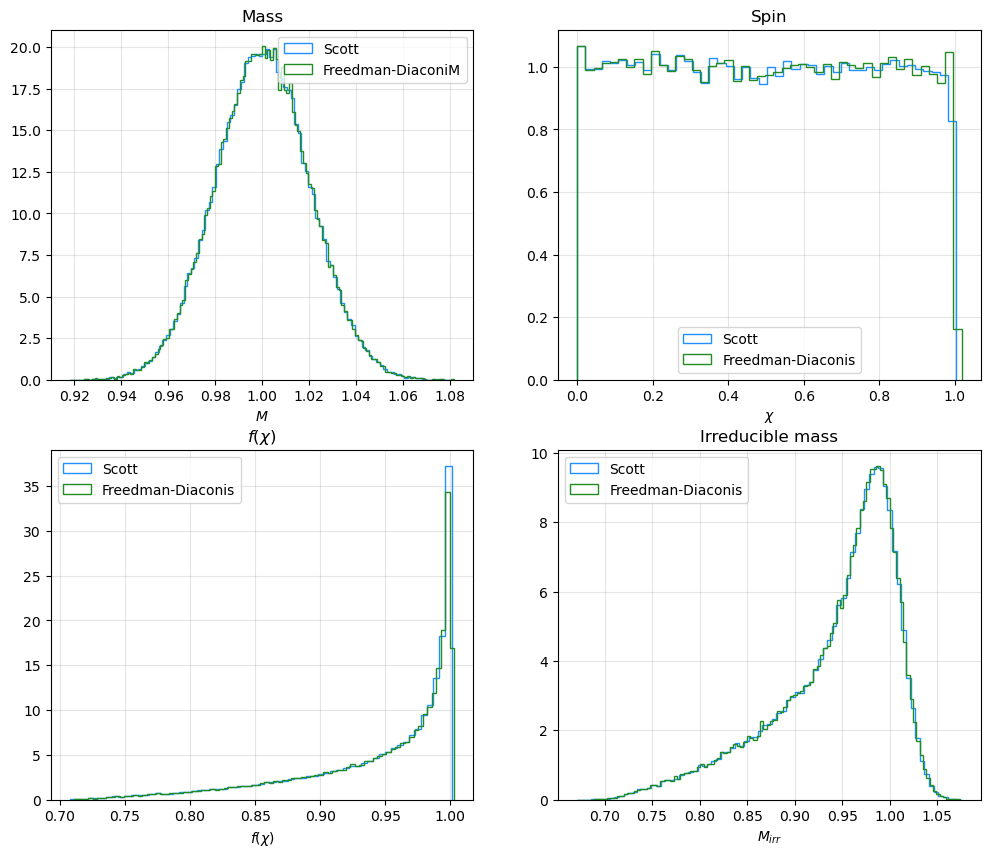

In [19]:
#Function of the irreducible mass
def Mirr(M, chi):   
    return M*np.sqrt((1+np.sqrt(1-chi**2))/2)

def f(M, Mirr):
    return Mirr/M

N = 100000
mu = 1         #All masses in the problem are measured in units of mu
sigma = 0.02

chi = np.random.uniform(0, 1, N)  #The spin is uniformly distributed between 0 and 1.
M = np.random.normal(mu, sigma, N) #The mass is normally distributed with mean mu and standard deviation sigma

#M_irr for each mass and chi 
M_irr = Mirr(M, chi)  

#Evaluate f
f_chi = f(M, M_irr)

#I plot the histogram using the freedman and the scott rule for the bins
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#Mass
fancyhist(M, bins='scott', density = True, ax = ax[0, 0], histtype = 'step', linewidth = 1,  color = 'dodgerblue', label="Scott")
fancyhist(M, bins='freedman', density = True, ax = ax[0, 0], histtype = 'step', linewidth = 1,  color = 'forestgreen', label="Freedman-DiaconiM")
ax[0, 0].grid(c='grey', alpha = 0.2)
ax[0, 0].legend()
ax[0, 0].set_xlabel('$M$')
ax[0, 0].set_title('Mass')

#Spin
fancyhist(chi, bins='scott', density = True, ax = ax[0, 1], histtype = 'step', linewidth = 1,  color = 'dodgerblue', label="Scott")
fancyhist(chi, bins='freedman', density = True, ax = ax[0, 1], histtype = 'step', linewidth = 1,  color = 'forestgreen', label="Freedman-Diaconis")
ax[0, 1].grid(c='grey', alpha = 0.2)
ax[0, 1].legend()
ax[0, 1].set_xlabel('$\\chi$')
ax[0, 1].set_title('Spin')

#f
fancyhist(f_chi, bins='scott', density = True, ax = ax[1, 0], histtype = 'step', linewidth = 1,  color = 'dodgerblue', label="Scott")
fancyhist(f_chi, bins='freedman', density = True, ax = ax[1, 0], histtype = 'step', linewidth = 1,  color = 'forestgreen', label="Freedman-Diaconis")
ax[1, 0].grid(c='grey', alpha = 0.2)
ax[1, 0].legend()
ax[1, 0].set_xlabel('$f(\\chi)$')
ax[1, 0].set_title('$f(\\chi)$')

#M_irr
fancyhist(M_irr, bins='scott', density = True, ax = ax[1, 1], histtype = 'step', linewidth = 1,  color = 'dodgerblue', label="Scott")
fancyhist(M_irr, bins='freedman', density = True, ax = ax[1, 1], histtype = 'step', linewidth = 1,  color = 'forestgreen', label="Freedman-Diaconis")
ax[1, 1].grid(c='grey', alpha = 0.2)
ax[1, 1].legend()
ax[1, 1].set_xlabel('$M_{irr}$')
ax[1, 1].set_title('Irreducible mass')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


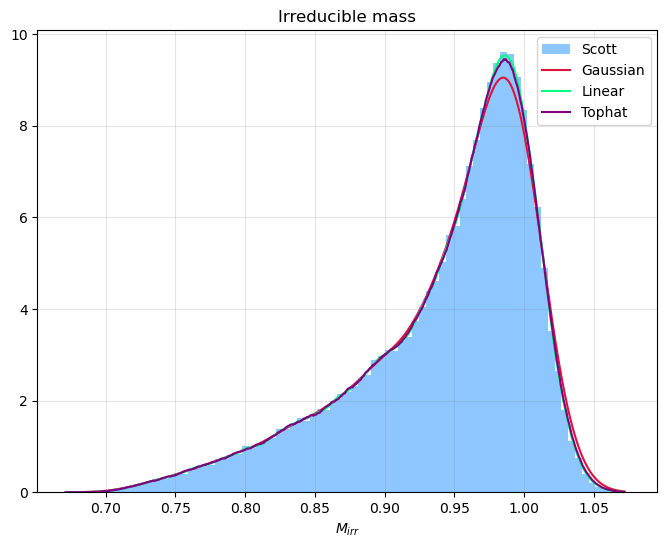

In [20]:
#Use this instead of M_irr for plotting
Mgrid = np.linspace(M_irr.min(), M_irr.max(), 1000) 

#I define the function for genereting the distribution of M_irr using a KDE
def KDE(M_irr, bandwidth, kernel):    
   KDE = KernelDensity(bandwidth=bandwidth, kernel= kernel) 
   KDE.fit(M_irr[:, np.newaxis]) #Sklearn returns log(density)
   return np.exp(KDE.score_samples(Mgrid[:, np.newaxis]))
    
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.gca()
ax2.grid(c='grey', alpha = 0.2)
ax2.legend()
ax2.set_xlabel('$M_{irr}$')

ax2.set_title('Irreducible mass')
fancyhist(M_irr, bins='scott', density = True, ax= ax2, histtype = 'stepfilled', linewidth = 1,  color = 'dodgerblue', label="Scott", alpha=0.5)

#I plot it using different kernel
kde_gauss = KDE(M_irr, 0.01, kernel = 'gaussian')
ax2.plot(Mgrid, kde_gauss, color = 'crimson', label='Gaussian')

kde_lin = KDE(M_irr, 0.01, 'linear')
ax2.plot(Mgrid, kde_lin, color = 'springgreen', label='Linear')

kde_top = KDE(M_irr, 0.01, 'tophat')
ax2.plot(Mgrid, kde_top, color = 'purple', label='Tophat')

ax2.legend()

Text(0.5, 1.0, 'KS distance between $M_{irr}$ and $f$ as a function of $\\sigma$')

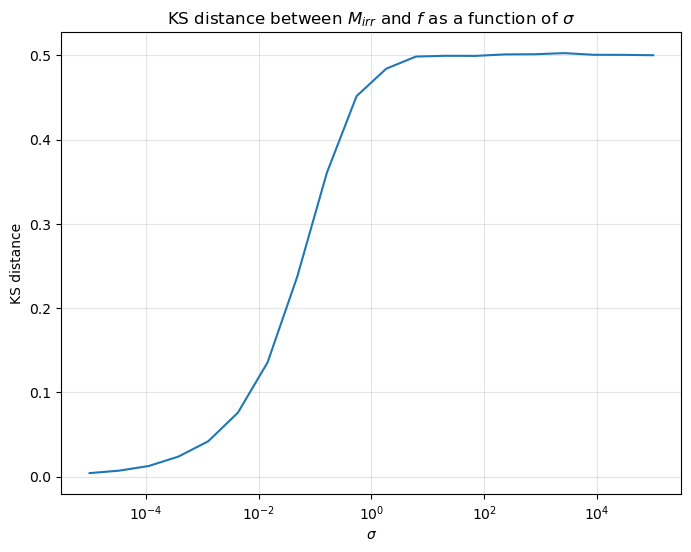

In [21]:
#Now I need to evaluate the KS distance with different sigmas
#First we need different distribution of M and M_irr with different sigmas
sigmas = np.logspace(-5,5,20)
masses = []

for i in sigmas:
    masses.append(np.random.normal(mu, i, N)) #List of 20 elements, each an array of float

masses_irr = []
for i in masses:
    masses_irr.append(Mirr(i, chi)) #List of 20 elements, each an array of float
    
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.gca()
ax1.grid(c='grey', alpha = 0.2)

function = []
for i in range(len(masses)):
    function.append(f(masses[i], masses_irr[i]))
    
ks_test_irr = []
for i in range(len(masses)) :
     ks_test_irr.append(scipy.stats.ks_2samp(masses_irr[i], function[i]).statistic)

#Plot KS distance between M_{irr} and f as a function of sigma  
ax1.plot(sigmas, ks_test_irr)
ax1.set_xscale('log')
ax1.set_xlabel('$\sigma$')
ax1.set_ylabel('KS distance')
ax1.set_title('KS distance between $M_{irr}$ and $f$ as a function of $\sigma$')

As we can observe in the plot, the KS distance between the irreducible mass and the function f becomes smaller and smaller $\sigma << \mu$, meaning that the distributions are the same.

Text(0.5, 1.0, 'KS distance between $M_{irr}$ and $M$ as a function of $\\sigma$')

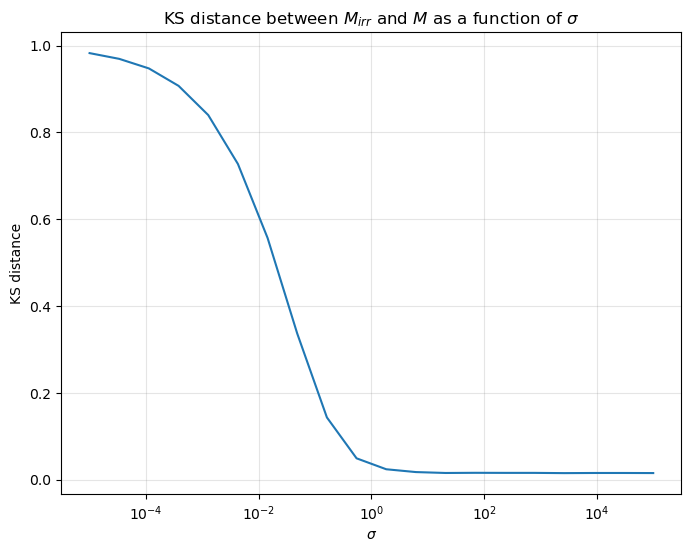

In [22]:
#Compute the KS distance between M_{irr} and M as a function of sigma.
ks_test = []
for i in range(len(masses)) :
     ks_test.append(scipy.stats.ks_2samp(masses_irr[i], masses[i]).statistic)

#Plot it
fig3 = plt.figure(figsize=(8,6))
ax3 = fig3.gca()    
ax3.plot(sigmas, ks_test)
ax3.set_xscale('log')
ax3.grid(c='grey', alpha = 0.2)
ax3.set_xlabel('$\sigma$')
ax3.set_ylabel('KS distance')
ax3.set_title('KS distance between $M_{irr}$ and $M$ as a function of $\sigma$')

The KS distance between the irreducible mass and the mass becomes smaller for $\sigma >> \mu$, meaning that the distributions are the same.

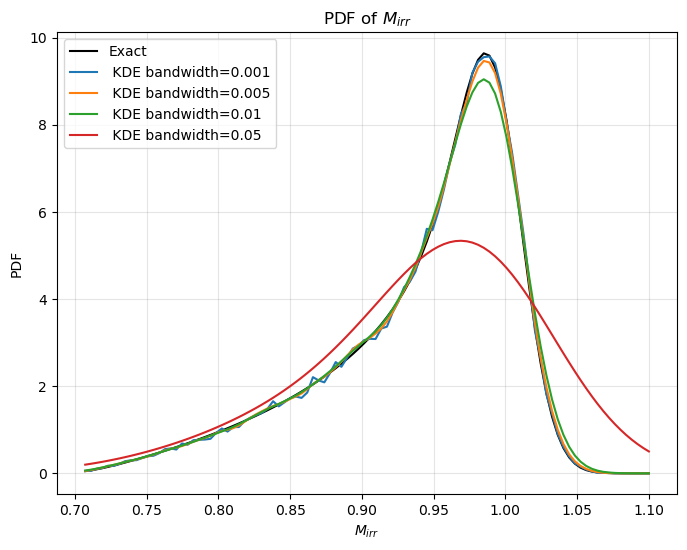

In [23]:
#Pdf of Mirr
#I know that Mirr=M*f(chi), I know the distribution of chi and M that is the normal one
#I can use the tranformation rule to derive the pdf of f

m_irr_grid = np.linspace(min(1-5*sigma, 1/2**0.5), 1+5*sigma, 100)

#Compute the pdf of f 
def pdf_f(f):
    return np.abs((2-4*f**2) / np.sqrt(1 - f**2)) #Remember that chi is uniformely distributed bt 0 and 1 so pdf(chi)=1!

#Definition of the integrand for the convolution
def integrand(f, masses, mu, sigma):
    return (pdf_f(f)*norm.pdf(masses/f, mu, sigma))/np.abs(f)

Mirr_pdf=[]
for xt in m_irr_grid:  
    Mirr_pdf.append(integrate.quad(lambda f: integrand(f, xt, mu, sigma), 1/np.sqrt(2), 1)[0])

fig4 = plt.figure(figsize=(8,6))
ax4 = fig4.gca()    
ax4.plot(m_irr_grid, Mirr_pdf, label='Exact', c='black')
#ax4.set_yscale('log')
ax4.grid(c='grey', alpha = 0.2)
#ax4.set_yscale('log')
ax4.set_xlabel('$M_{irr}$')
ax4.set_ylabel('PDF')
ax4.set_title('PDF of $M_{irr}$')

#Now we evaluate it using KDE method
# Load the KDE module

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(m_irr_grid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

bandwidth = [0.001, 0.005, 0.01, 0.05] 

for i in bandwidth:
    kdepdf = kde_sklearn(M_irr, bandwidth=i, kernel="gaussian")

    ax4.plot(m_irr_grid, kdepdf, label=' KDE bandwidth='+str(i))

ax4.legend();
